Credit Risk Modeling & Early Default Prediction

Dataset: Home Credit Default Risk (Home Credit Group)
Objective: Understand the structure, quality, and risk characteristics of the dataset to support explainable credit risk modeling.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/application_train.csv")

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [3]:
df.shape

(307511, 122)

The dataset contains customer-level application data with a large number of financial and demographic variables, typical of real-world credit risk datasets

In [4]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [5]:
df['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Target = 1 (customer defaulted)
Target = 0 (customer did not default)
The target variable is highly imbalanced, reflecting real-world credit portfolios, and indicates that accuracy alone is not an appropriate evaluation metric.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
missing_pct = df.isnull().mean().sort_values(ascending = False)
missing_pct.head(10)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
dtype: float64

Missing values in credit datasets often reflect data availability or customer behavior rather than random omission, and may themselves carry risk information

In [8]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,3.075110e+05,3.075110e+05,307499.000000
mean,1.687979e+05,5.990260e+05,27108.573909
std,2.371231e+05,4.024908e+05,14493.737315
min,2.565000e+04,4.500000e+04,1615.500000
25%,1.125000e+05,2.700000e+05,16524.000000
50%,1.471500e+05,5.135310e+05,24903.000000
75%,2.025000e+05,8.086500e+05,34596.000000
max,1.170000e+08,4.050000e+06,258025.500000


In [9]:
import matplotlib.pyplot as plt

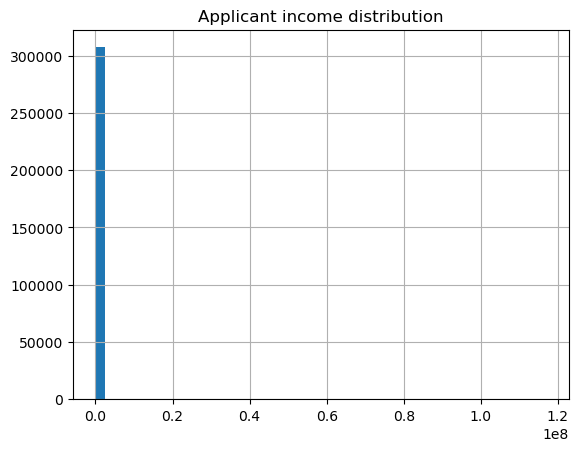

In [10]:
df['AMT_INCOME_TOTAL'].hist(bins=50)
plt.title("Applicant income distribution")
plt.show()

The applicant income distribution is highly right-skewed, with a small number of extreme outliers. This suggests that raw income values may not be directly suitable for modeling and motivates the use of ratio-based features, such as credit-to-income and annuity-to-income ratios, to better capture relative financial risk.

In [11]:
df[['AMT_CREDIT', 'AMT_ANNUITY']].describe()

,AMT_CREDIT,AMT_ANNUITY
count,3.075110e+05,307499.000000
mean,5.990260e+05,27108.573909
std,4.024908e+05,14493.737315
min,4.500000e+04,1615.500000
25%,2.700000e+05,16524.000000
50%,5.135310e+05,24903.000000
75%,8.086500e+05,34596.000000
max,4.050000e+06,258025.500000


Day 1 EDA Completed. 

Day 2 of preparing data for a regulated financial model.

In [12]:
target= 'TARGET'
id_col = 'SK_ID_CURR'

In [13]:
y=df[target]
x=df.drop(columns=[target, id_col])

I removed identifiers to prevent data leakage and ensure the model learns only from applicant characteristics.

In [14]:
missing = x.isnull().mean().sort_values(ascending=False)
missing.head(10)

COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_MEDI       0.683550
dtype: float64

Some variables missing 50-70%

Decision rules
>60% Will drop the feature, low infomation value
5%- 60% median impute + flag, missingness may be informative
<5% median impute only, likely missing at random

In [15]:
num_cols = x.select_dtypes(include= ['int64', 'float']).columns

In [75]:
for col in num_cols:
    missing_rate = x[col].isnull().mean()
    
    if missing_rate > 0.6:
        x.drop(columns=[col], inplace=True)
    elif missing_rate > 0.05:
        x[col + '_missing_flag'] = x[col].isnull().astype(int)
        # Use assignment instead of inplace=True
        x[col] = x[col].fillna(x[col].median())
    else:
        # Use assignment instead of inplace=True
        x[col] = x[col].fillna(x[col].median())

KeyError: 'OWN_CAR_AGE'

In [17]:
cat_cols = x.select_dtypes(include=['object']).columns
len(cat_cols)

16

In [18]:
x= pd.get_dummies(x, columns=cat_cols, drop_first =True)

One-hot encoding was applied to categorical variables to preserve interpretability and avoid imposing ordinal assumptions

In [19]:
x['credit_income_ratio'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
x['annuity_income_ratio'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
x['credit_term'] = df['AMT_CREDIT'] / df['AMT_CREDIT'] / df['AMT_ANNUITY']

In [20]:
x['employment_years'] = (-df['DAYS_EMPLOYED']) / 365
x['employment_bucket'] = pd.cut(
    x['employment_years'],
    bins=[0, 1, 3, 5, 10, 50],
    labels=['<1yr', '1-3yrs', '3-5yrs', '5-10yrs', '10+yrs']
)
x = pd.get_dummies(x, columns=['employment_bucket'], drop_first=True)

In [21]:
x.isnull().sum().sum()

np.int64(24)

In [22]:
x.shape

(307511, 256)

In [23]:
x.isnull().sum().sort_values(ascending=False).head(10)

credit_term                             12
annuity_income_ratio                    12
CNT_CHILDREN                             0
OCCUPATION_TYPE_Realty agents            0
WEEKDAY_APPR_PROCESS_START_MONDAY        0
OCCUPATION_TYPE_Waiters/barmen staff     0
OCCUPATION_TYPE_Security staff           0
OCCUPATION_TYPE_Secretaries              0
OCCUPATION_TYPE_Sales staff              0
OCCUPATION_TYPE_Medicine staff           0
dtype: int64

In [24]:
import numpy as np

In [25]:
#replacing infinite values with NaN
x.replace([np.inf, -np.inf], np.nan, inplace = True)

In [ ]:
#remaining NaNs will be imputed by median
for col in x.columns:
    if x[col].isnull().sum() > 0:
        x[col].fillna(x[col].median(), inplace = True)

In [27]:
x.isnull().sum().sum()

np.int64(0)

Ratio-based features introduced a small number of missing values due to division by zero and special employment codes. These were handled by replacing infinite values and applying median imputation to preserve distributional integrity

What drives Risk

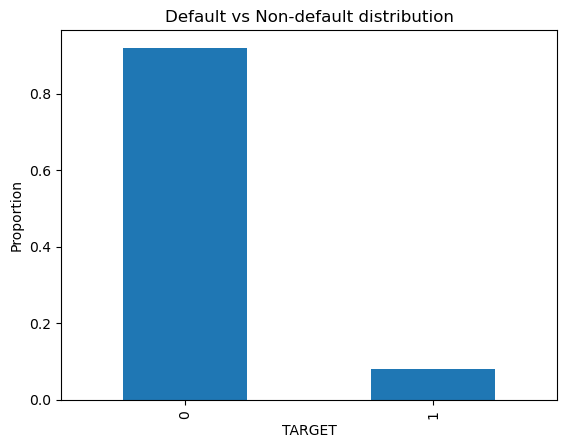

In [28]:
df['TARGET'].value_counts(normalize=True).plot(kind='bar')
plt.title("Default vs Non-default distribution")
plt.ylabel("Proportion")
plt.show()

Income Vs Default Risk (Boxplot)

In [29]:
import seaborn as sns

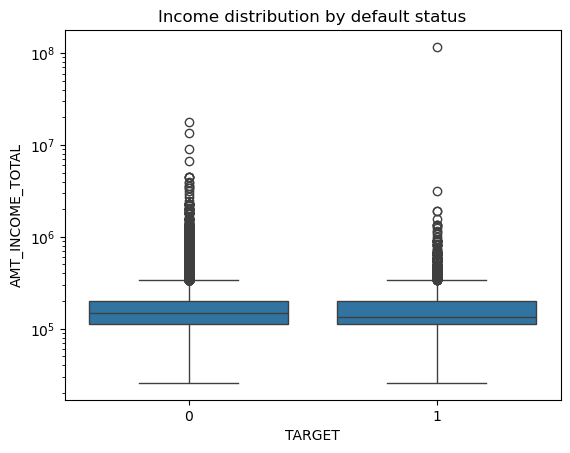

In [30]:
sns.boxplot(x= 'TARGET', y= 'AMT_INCOME_TOTAL', data = df)
plt.title("Income distribution by default status")
plt.yscale('log')
plt.show()

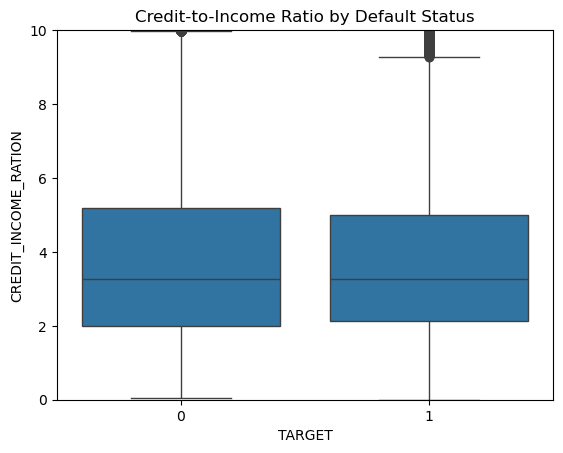

In [31]:
df['CREDIT_INCOME_RATION'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
sns.boxplot(x= 'TARGET', y= 'CREDIT_INCOME_RATION', data=df)
plt.title("Credit-to-Income Ratio by Default Status")
plt.ylim(0, 10)
plt.show()

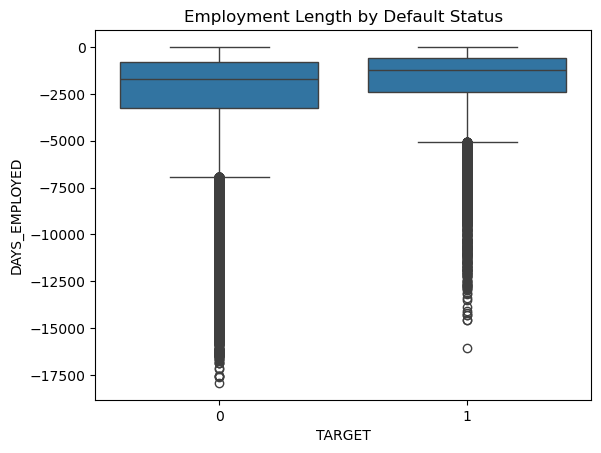

In [32]:
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=df[df['DAYS_EMPLOYED'] < 0])
plt.title("Employment Length by Default Status")
plt.show()

I engineered financial ratios directly in the modeling dataset to ensure consistency between EDA, model training, and business interpretation

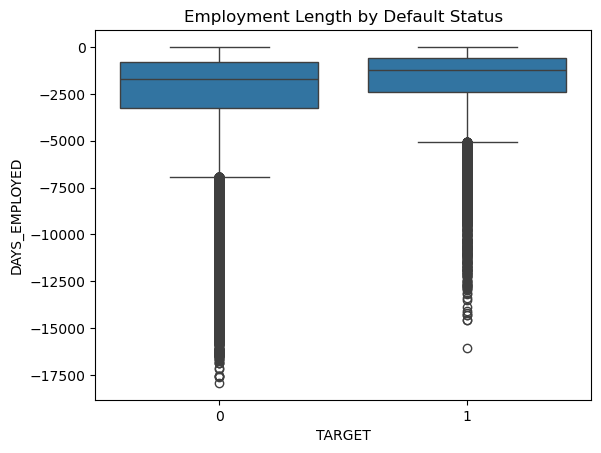

In [33]:
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=df[df['DAYS_EMPLOYED'] < 0])
plt.title("Employment Length by Default Status")
plt.show()

Shorter employment tenure is associated with elevated default risk

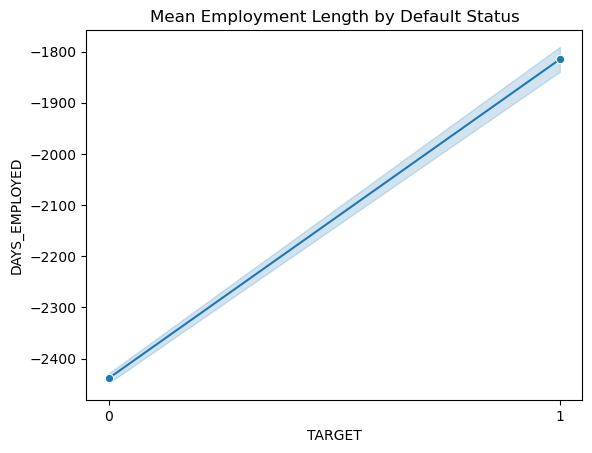

In [34]:
sns.lineplot(x='TARGET', y='DAYS_EMPLOYED', data=df[df['DAYS_EMPLOYED'] < 0], marker='o')
plt.title("Mean Employment Length by Default Status")
plt.xticks([0, 1]) # Ensures only 0 and 1 show on the axis
plt.show()

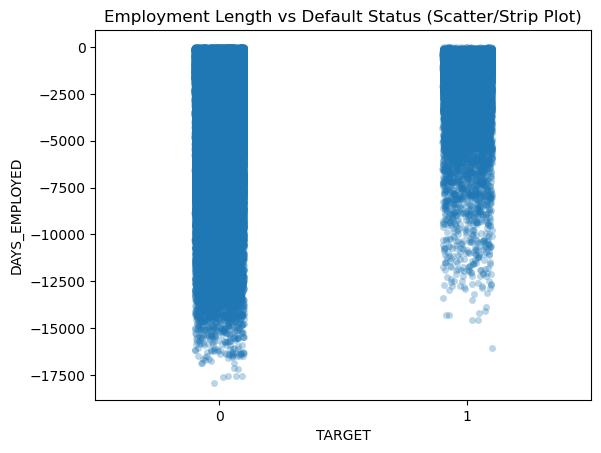

In [35]:
# Using stripplot (the standard way to do a scatter plot with categorical data)
sns.stripplot(x='TARGET', y='DAYS_EMPLOYED', data=df[df['DAYS_EMPLOYED'] < 0], alpha=0.3, jitter=True)
plt.title("Employment Length vs Default Status (Scatter/Strip Plot)")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42, stratify = y)

Used Stratify to ensure rate is preserved 

Feature Scaling 

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Why scaling, because Logistic regression assumes features are on similar scale

TRAINING THE MODEL

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model = LogisticRegression(max_iter = 1000, class_weight ='balanced', solver = 'lbfgs')
log_model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Why class_weight='balanced'?

Defaults are rare → avoids bias toward non-defaults.

In [43]:
y_pred = log_model.predict(x_test_scaled)
y_prob = log_model.predict_proba(x_test_scaled)[:, 1] #Prob of default (pd)

In [44]:
#Model Evaluation ROC - AUC
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

np.float64(0.750479441199294)

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

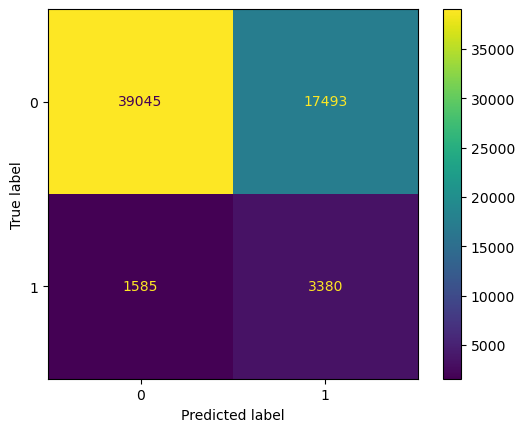

In [47]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot() #False negatives are riskier than false positives in lending.

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.68      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.69      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [50]:
threshold = 0.3
y_custom_pred = (y_prob >= threshold).astype(int)

In [51]:
coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(10)

,Feature,Coefficient
2,AMT_CREDIT,0.856221
145,NAME_EDUCATION_TYPE_Secondary / secondary special,0.462972
48,BASEMENTAREA_MEDI,0.407216
142,NAME_EDUCATION_TYPE_Higher education,0.327665
36,LIVINGAREA_AVG,0.306009
57,OBS_30_CNT_SOCIAL_CIRCLE,0.252545
51,ENTRANCES_MEDI,0.240664
41,ELEVATORS_MODE,0.180084
7,DAYS_EMPLOYED,0.156079
143,NAME_EDUCATION_TYPE_Incomplete higher,0.155545


In [52]:
#Logistic Regression was selected as the baseline credit risk model due to its interpretability and regulatory suitability. 
#Model coefficients provide transparent insight into how borrower characteristics influence default risk, making the model appropriate for governance, validation, and policy decision-making.

In [53]:
results_df = x_test.copy()
results_df['actual_default'] = y_test.values
results_df['predicted_pd'] = y_prob
results_df['risk_segment'] = pd.cut(
    y_prob,
    bins=[0, 0.2, 0.5, 1],
    labels=['Low', 'Medium', 'High']
)

results_df.to_csv("logistic_regression_predictions.csv", index=False)

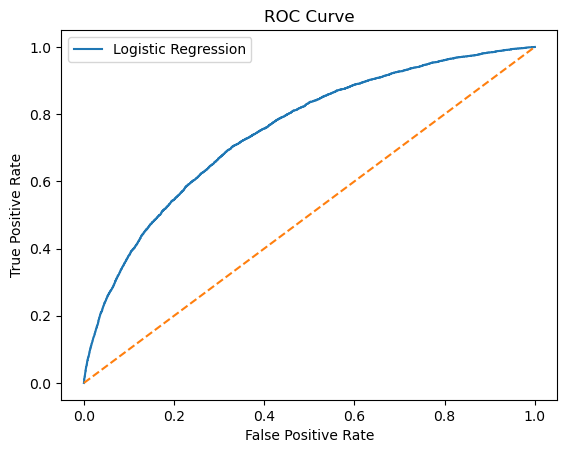

In [54]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [55]:
ks_df = pd.DataFrame({
    'y_true': y_test,
    'y_prob': y_prob
}).sort_values('y_prob')

ks_df['cum_good'] = (ks_df['y_true'] == 0).cumsum() / (ks_df['y_true'] == 0).sum()
ks_df['cum_bad'] = (ks_df['y_true'] == 1).cumsum() / (ks_df['y_true'] == 1).sum()

ks_stat = max(abs(ks_df['cum_good'] - ks_df['cum_bad']))
ks_stat

0.3742388484220275

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
train_prob = log_model.predict_proba(x_train_scaled)[:,1]

train_auc = roc_auc_score(y_train, train_prob)
test_auc = roc_auc_score(y_test, y_prob)

train_auc, test_auc

(np.float64(0.7520685430697909), np.float64(0.750479441199294))

In [58]:
coef_df.sort_values('Coefficient', ascending = False)

,Feature,Coefficient
2,AMT_CREDIT,0.856221
145,NAME_EDUCATION_TYPE_Secondary / secondary special,0.462972
48,BASEMENTAREA_MEDI,0.407216
142,NAME_EDUCATION_TYPE_Higher education,0.327665
36,LIVINGAREA_AVG,0.306009
...,...,...
137,NAME_INCOME_TYPE_Pensioner,-0.272808
27,EXT_SOURCE_2,-0.378603
30,BASEMENTAREA_AVG,-0.417049
28,EXT_SOURCE_3,-0.493747


In [59]:
results_df.groupby('risk_segment')['actual_default'].mean()

C:\Users\sidda\AppData\Local\Temp\ipykernel_46304\2121572333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_df.groupby('risk_segment')['actual_default'].mean()


risk_segment
Low       0.015841
Medium    0.045930
High      0.161932
Name: actual_default, dtype: float64

The logistic regression model was validated using ROC-AUC, KS statistic, and stability checks between training and test datasets. 
Performance consistency and intuitive coefficient behavior indicate a stable and interpretable model suitable for credit risk decision support.
Risk segmentation further confirms the model’s ability to distinguish borrower risk levels.

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb_model = XGBClassifier(
    n_estimators = 200,
    max_depth = 4,
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree = 0.8,
    eval_metric = 'auc',
    random_state = 42
)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
xgb_prob= xgb_model.predict_proba(x_test)[:,1]

In [63]:
xgb_auc = roc_auc_score(y_test, xgb_prob)
log_auc = roc_auc_score(y_test, y_prob)


In [64]:
log_auc, xgb_auc

(np.float64(0.750479441199294), np.float64(0.7570452451179625))

In [65]:
ks_df_xgb = pd.DataFrame({
    'y_true': y_test,
    'y_prob': xgb_prob
}).sort_values('y_prob')

ks_df_xgb['cum_good'] = (ks_df_xgb['y_true'] == 0).cumsum() / (ks_df_xgb['y_true'] == 0).sum()
ks_df_xgb['cum_bad'] = (ks_df_xgb['y_true'] == 1).cumsum() / (ks_df_xgb['y_true'] == 1).sum()

ks_xgb = max(abs(ks_df_xgb['cum_good'] - ks_df_xgb['cum_bad']))
ks_xgb

0.3855924507742246

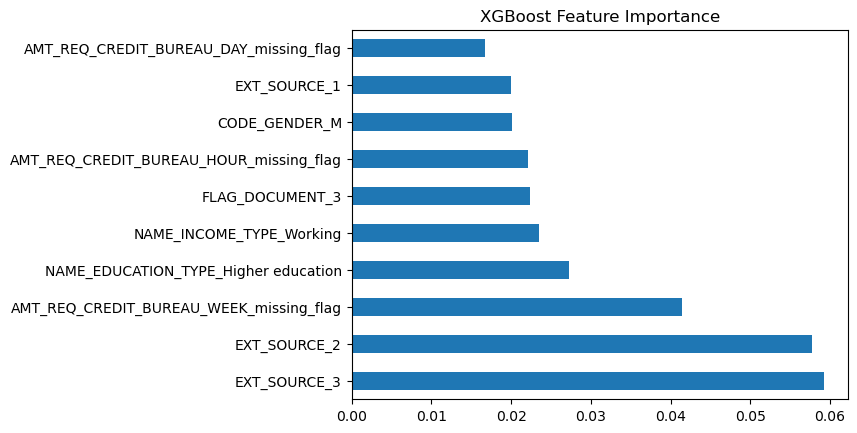

In [66]:
importances = pd.Series(xgb_model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("XGBoost Feature Importance")
plt.show()

XGBoost captures nonlinear relationships but lacks coefficient-level transparency.

While XGBoost demonstrated improved predictive performance, Logistic Regression was retained as the primary model due to its interpretability, stability, and regulatory suitability. 
XGBoost is positioned as a challenger model for monitoring and performance benchmarking

In [67]:
results_df.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'annuity_income_ratio', 'credit_term', 'employment_years',
       'employment_bucket_1-3yrs', 'employment_bucket_3-5yrs',
       'employment_bucket_5-10yrs', 'employment_bucket_10+yrs',
       'actual_default', 'predicted_pd', 'risk_segment'],
      dtype='object', length=259)

In [68]:
'SK_ID_CURR' in df.columns

True

In [69]:
results_df = df.loc[x_test.index, ['SK_ID_CURR']].copy()

results_df['actual_default'] = y_test.values
results_df['predicted_pd'] = y_prob

results_df['risk_segment'] = pd.cut(
    y_prob,
    bins=[0, 0.2, 0.5, 1],
    labels=['Low', 'Medium', 'High']
)

In [70]:
results_df.to_csv("credit_risk_predictions.csv", index = False)

In [71]:
results_df.head()

,SK_ID_CURR,actual_default,predicted_pd,risk_segment
256571,396899,0,0.411166,Medium
191493,322041,0,0.294763,Medium
103497,220127,0,0.766644,High
130646,251531,0,0.530033,High
211898,345558,0,0.593335,High


In [72]:
key_features= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CREDIT_INCOME_RATION', 'DAYS_EMPLOYED']

In [73]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CREDIT_INCOME_RATION'],
      dtype='object', length=123)

In [74]:
results_df = results_df.merge(df.loc[x_test.index, key_features], left_index = True, right_index = True)